In [2]:
# Imports
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
# read file
df = pd.read_csv(r"C:\Users\rsele\OneDrive\Data Science\Projekt\ML_with_SQL_Tableau\data\raw\aug_train.csv")


In [4]:
df.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

In [5]:
# Check datatype per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
df.experience.unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [7]:
# Count observations where experience is unknown
df[df.experience=="unknown"].count()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [8]:
# Drop unknown experiences since there are only 65. Convert years of experiences to int
df.drop(df.index[df["experience"] == "unknown"], inplace = True)
df.replace(">20","20",inplace=True)
df.replace("<1","0",inplace=True)
df["experience"] = pd.to_numeric(df["experience"])
df.experience.unique()

array([20., 15.,  5.,  0., 11., 13.,  7., 17.,  2., 16.,  1.,  4., 10.,
       14., 18., 19., 12.,  3.,  6.,  9.,  8., nan])

In [9]:
# Check for NANs
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [10]:
# Fill NAN with unknown 
df.fillna("unknown",inplace=True)

In [11]:
df.shape

(19158, 14)

In [12]:
df.describe()


enrollee_id  city_development_index  training_hours        target
count  19158.000000            19158.000000    19158.000000  19158.000000
mean   16875.358179                0.828848       65.366896      0.249348
std     9616.292592                0.123362       60.058462      0.432647
min        1.000000                0.448000        1.000000      0.000000
25%     8554.250000                0.740000       23.000000      0.000000
50%    16982.500000                0.903000       47.000000      0.000000
75%    25169.750000                0.920000       88.000000      0.000000
max    33380.000000                0.949000      336.000000      1.000000

Text(0.5, 1.0, 'Distribution of gender')

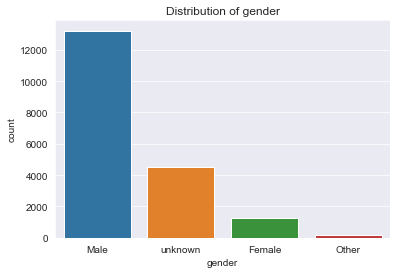

In [13]:
sns.set_style("darkgrid")
sns.countplot(x=df.gender).set_title("Distribution of gender")

Text(0.5, 1.0, 'Distribution of education')

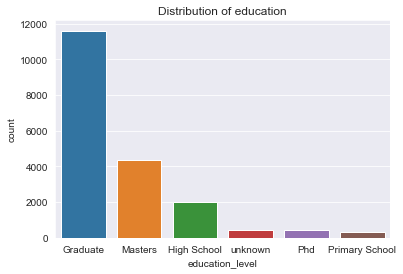

In [14]:
sns.countplot(x=df.education_level).set_title("Distribution of education")

C:\Users\rsele\anaconda3\envs\python_sql_tableau_project\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of training hours')

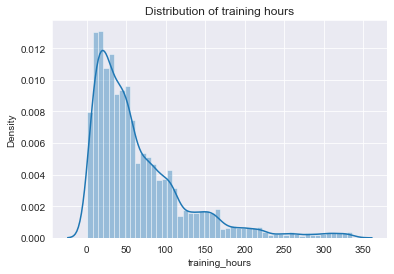

In [15]:
sns.distplot(df.training_hours).set_title("Distribution of training hours")

Text(0.5, 1.0, 'Distribution of training hours per education level')

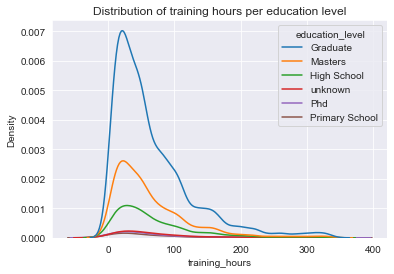

In [16]:
sns.kdeplot(data=df, x="training_hours",hue="education_level").set_title("Distribution of training hours per education level")


Text(0.5, 1.0, 'Distribution of training hours per gender')

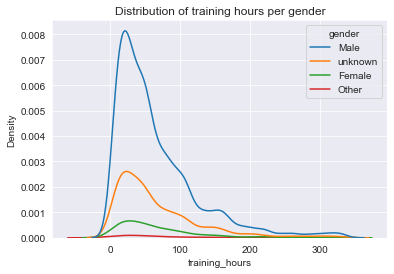

In [17]:
sns.kdeplot(data=df, x="training_hours",hue="gender").set_title("Distribution of training hours per gender")

C:\Users\rsele\anaconda3\envs\python_sql_tableau_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot of training hours')

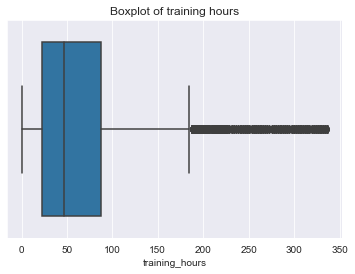

In [18]:
sns.boxplot(df.training_hours).set_title("Boxplot of training hours")

Text(0.5, 1.0, 'Distribution of experience')

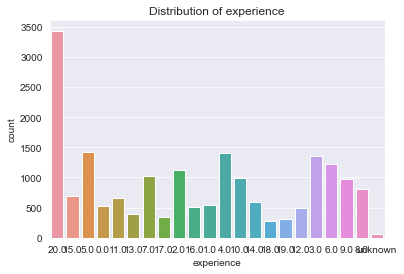

In [19]:
sns.countplot(x=df.experience).set_title("Distribution of experience")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'unknown'),
  Text(1, 0, '50-99'),
  Text(2, 0, '<10'),
  Text(3, 0, '10000+'),
  Text(4, 0, '5000-9999'),
  Text(5, 0, '1000-4999'),
  Text(6, 0, '10/49'),
  Text(7, 0, '100-500'),
  Text(8, 0, '500-999')])

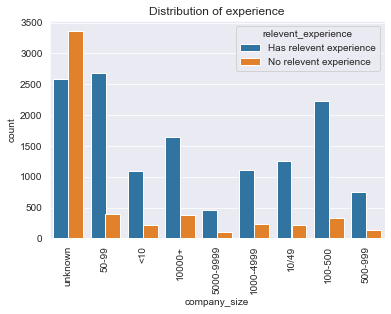

In [20]:
sns.countplot(x=df.company_size,hue=df.relevent_experience).set_title("Distribution of experience")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'STEM'),
  Text(1, 0, 'Business Degree'),
  Text(2, 0, 'unknown'),
  Text(3, 0, 'Arts'),
  Text(4, 0, 'Humanities'),
  Text(5, 0, 'No Major'),
  Text(6, 0, 'Other')])

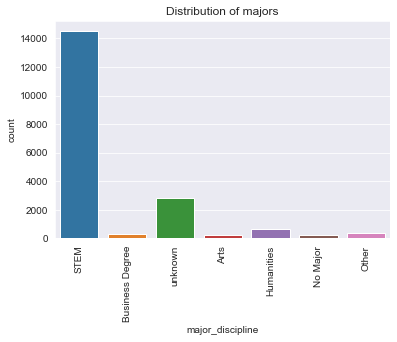

In [21]:
sns.countplot(x=df.major_discipline).set_title("Distribution of majors")
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'no_enrollment'),
  Text(1, 0, 'Full time course'),
  Text(2, 0, 'unknown'),
  Text(3, 0, 'Part time course')])

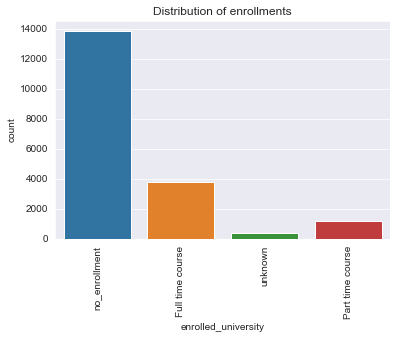

In [22]:
sns.countplot(x=df.enrolled_university).set_title("Distribution of enrollments")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Scatter plot of the relation between training hours and city development')

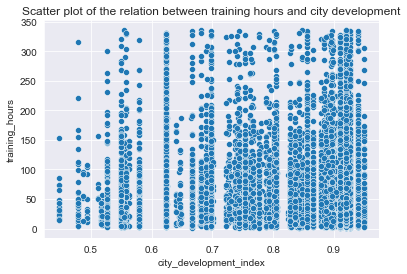

In [23]:
sns.scatterplot(x=df.city_development_index, y=df.training_hours).set_title("Scatter plot of the relation between training hours and city development")

Text(0.5, 1.0, 'Lineplot of the relation between training hours and city development')

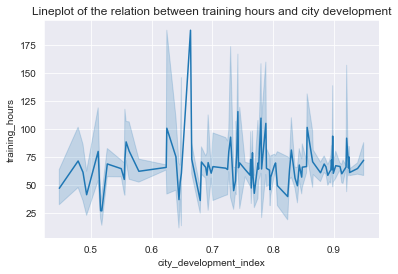

In [24]:
sns.lineplot(x=df.city_development_index, y=df.training_hours).set_title("Lineplot of the relation between training hours and city development")

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

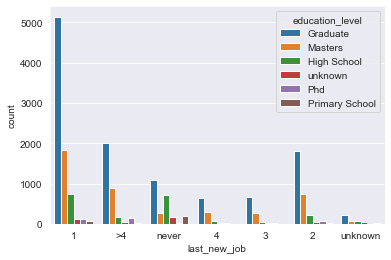

In [25]:
sns.countplot(x=df.last_new_job,hue=df.education_level)

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

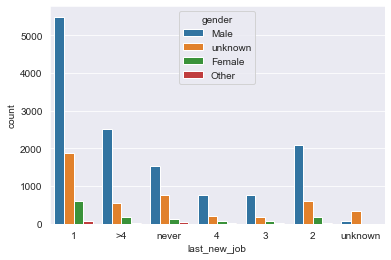

In [26]:
sns.countplot(x=df.last_new_job,hue=df.gender)

In [27]:
# Replacing strings with integers and treating unknown values as 0
df.last_new_job.replace(">4","4",inplace=True)
df.last_new_job.replace("never","0",inplace=True)
df.last_new_job.replace("unknown","0",inplace=True)
df.last_new_job = pd.to_numeric(df.last_new_job)

C:\Users\rsele\anaconda3\envs\python_sql_tableau_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Time in years since last job change')

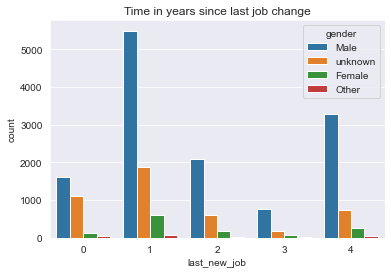

In [28]:
sns.countplot(df.last_new_job,hue=df.gender).set_title("Time in years since last job change")

C:\Users\rsele\anaconda3\envs\python_sql_tableau_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='last_new_job', ylabel='count'>

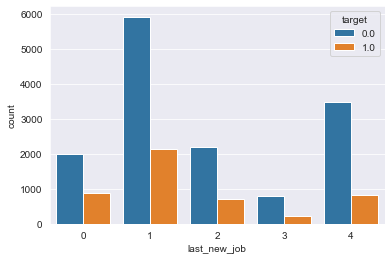

In [29]:
sns.countplot(df.last_new_job,hue=df.target)

C:\Users\rsele\anaconda3\envs\python_sql_tableau_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'People looking for new jobs based on Education')

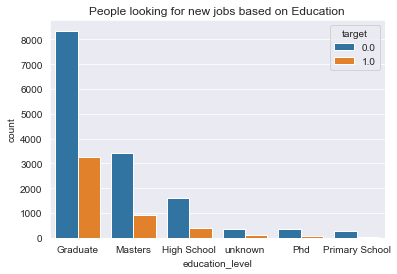

In [30]:
sns.countplot(df.education_level,hue=df.target).set_title("People looking for new jobs based on Education")

Text(0.5, 1.0, 'Distribution of people looking for new jobs based on their time in the current job')

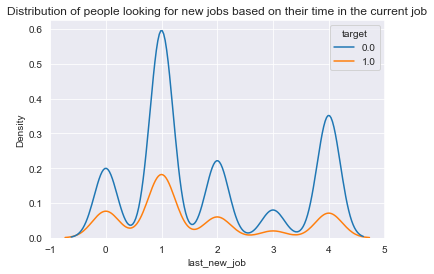

In [31]:
sns.kdeplot(df.last_new_job,hue=df.target).set_title("Distribution of people looking for new jobs based on their time in the current job")

Text(0.5, 1.0, 'People looking for new jobs based on city development')

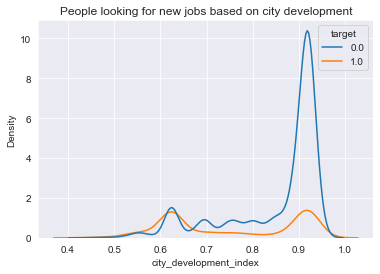

In [32]:
sns.kdeplot(df.city_development_index,hue=df.target).set_title("People looking for new jobs based on city development")

C:\Users\rsele\anaconda3\envs\python_sql_tableau_project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'STEM'),
  Text(1, 0, 'Business Degree'),
  Text(2, 0, 'unknown'),
  Text(3, 0, 'Arts'),
  Text(4, 0, 'Humanities'),
  Text(5, 0, 'No Major'),
  Text(6, 0, 'Other')])

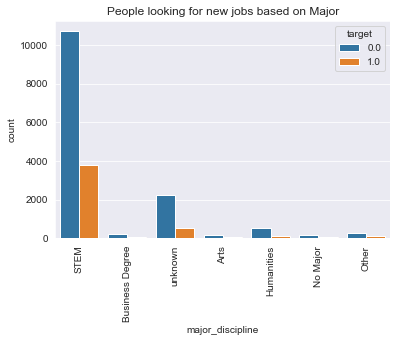

In [33]:
sns.countplot(df.major_discipline,hue=df.target).set_title("People looking for new jobs based on Major")
plt.xticks(rotation=90)

(array([-100.,  -50.,    0.,   50.,  100.,  150.,  200.,  250.,  300.,
         350.,  400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

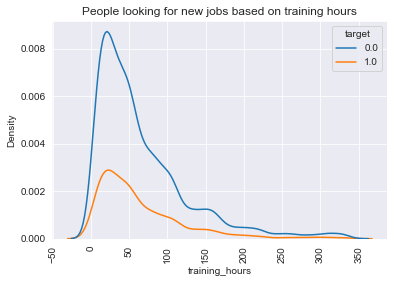

In [34]:
sns.kdeplot(df.training_hours,hue=df.target).set_title("People looking for new jobs based on training hours")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Korrelationsmatrix')

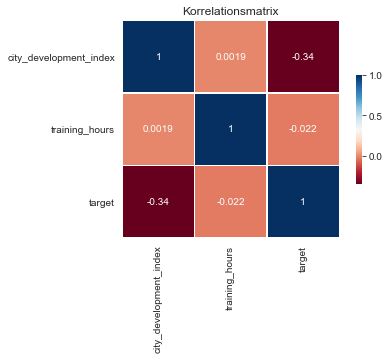

In [36]:
numeric = df[["city_development_index","training_hours","experience","target"]].corr()
sns.heatmap(numeric, cbar=True,cmap = "RdBu",square=True,annot=True ,
            linewidths=.5, cbar_kws={"shrink": .5}).set_title("Correlation Map")